# **EDA**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('/content/Crop_recommendation.csv')

In [66]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [67]:
df.shape

(2200, 8)

In [68]:
df.isna().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [69]:
df.duplicated().sum()

np.int64(0)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [71]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# **Insights:**


*    there are no extreme values in the data


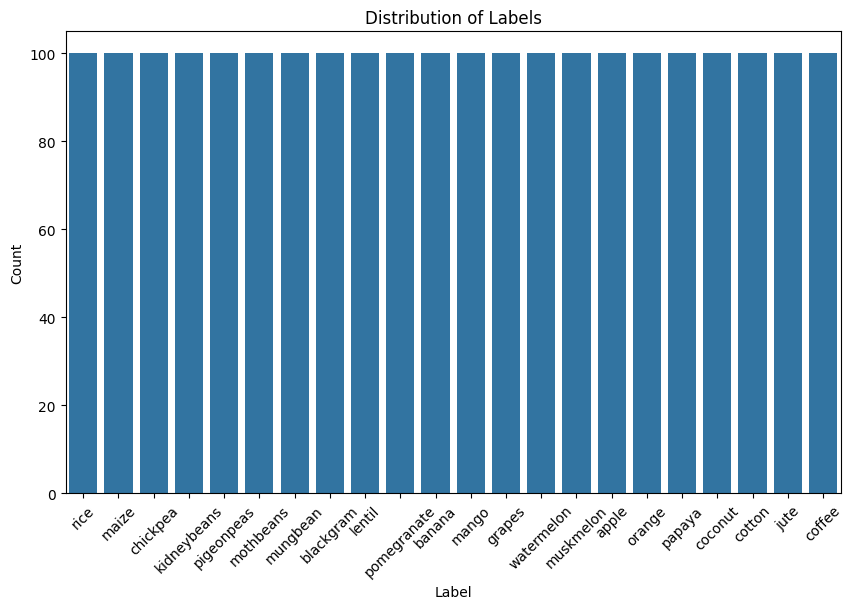

In [72]:
label_counts = df['label'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(rotation=45)
plt.show()

# **Insights:**


*   the previous plot shows that the dataset is **balanced**




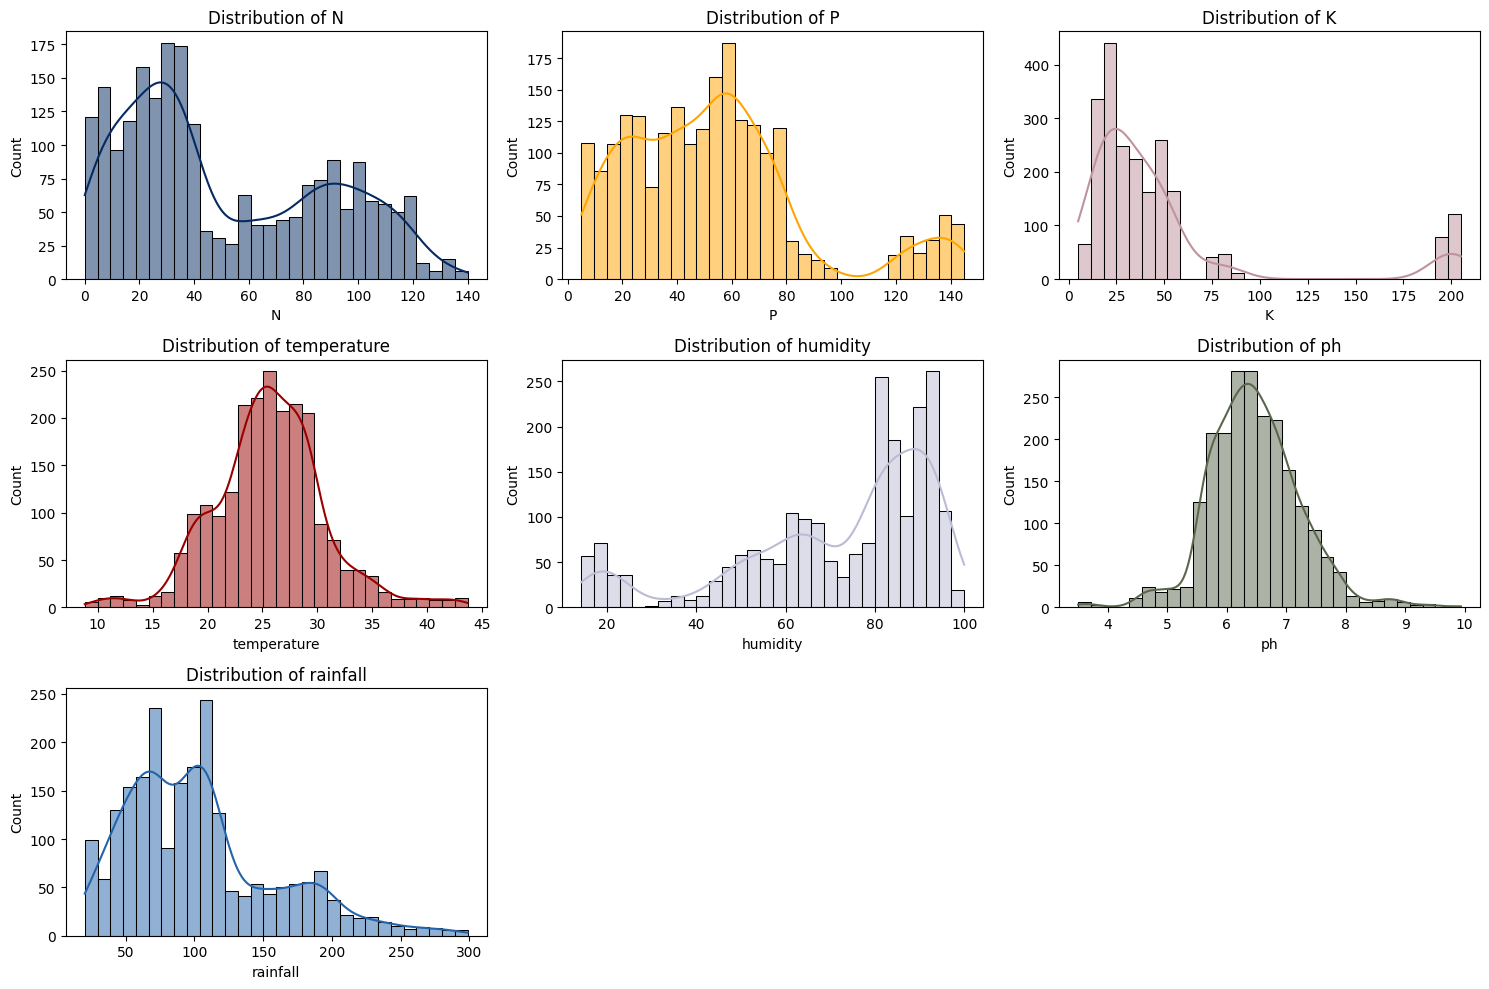

In [73]:
# Distribution of numerical features
num_features = ['N','P','K','temperature','humidity','ph','rainfall']

feature_colors = {
    'N': '#052A61',
    'P': '#FFA500',
    'K': '#bf939c',
    'temperature': '#990000',
    'humidity': '#BBBCD3',
    'ph': '#5a674c',
    'rainfall': '#2364AA'
}

plt.figure(figsize=(15,10))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color=feature_colors[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# **Insights:**


*    most of the "**temp**" values are between **20:30** C (normally distributed)
*    "**humidity**" has more than one peak (because of the change of the seasons and places)


*    "**ph**" is also normally distributed and most of the values are between **5.5:7.5**
*    "**N**" and "**P**" has more than one peak , "**K**" is right skewed making most of the values between **20:50** and a very small part of it at the **200**



*    "**rainfall**" is right skewed with most of its values between **50:200** , there are some outliers in the "rainfall" but we're not removing them because they may represent **real extreme weather conditions**




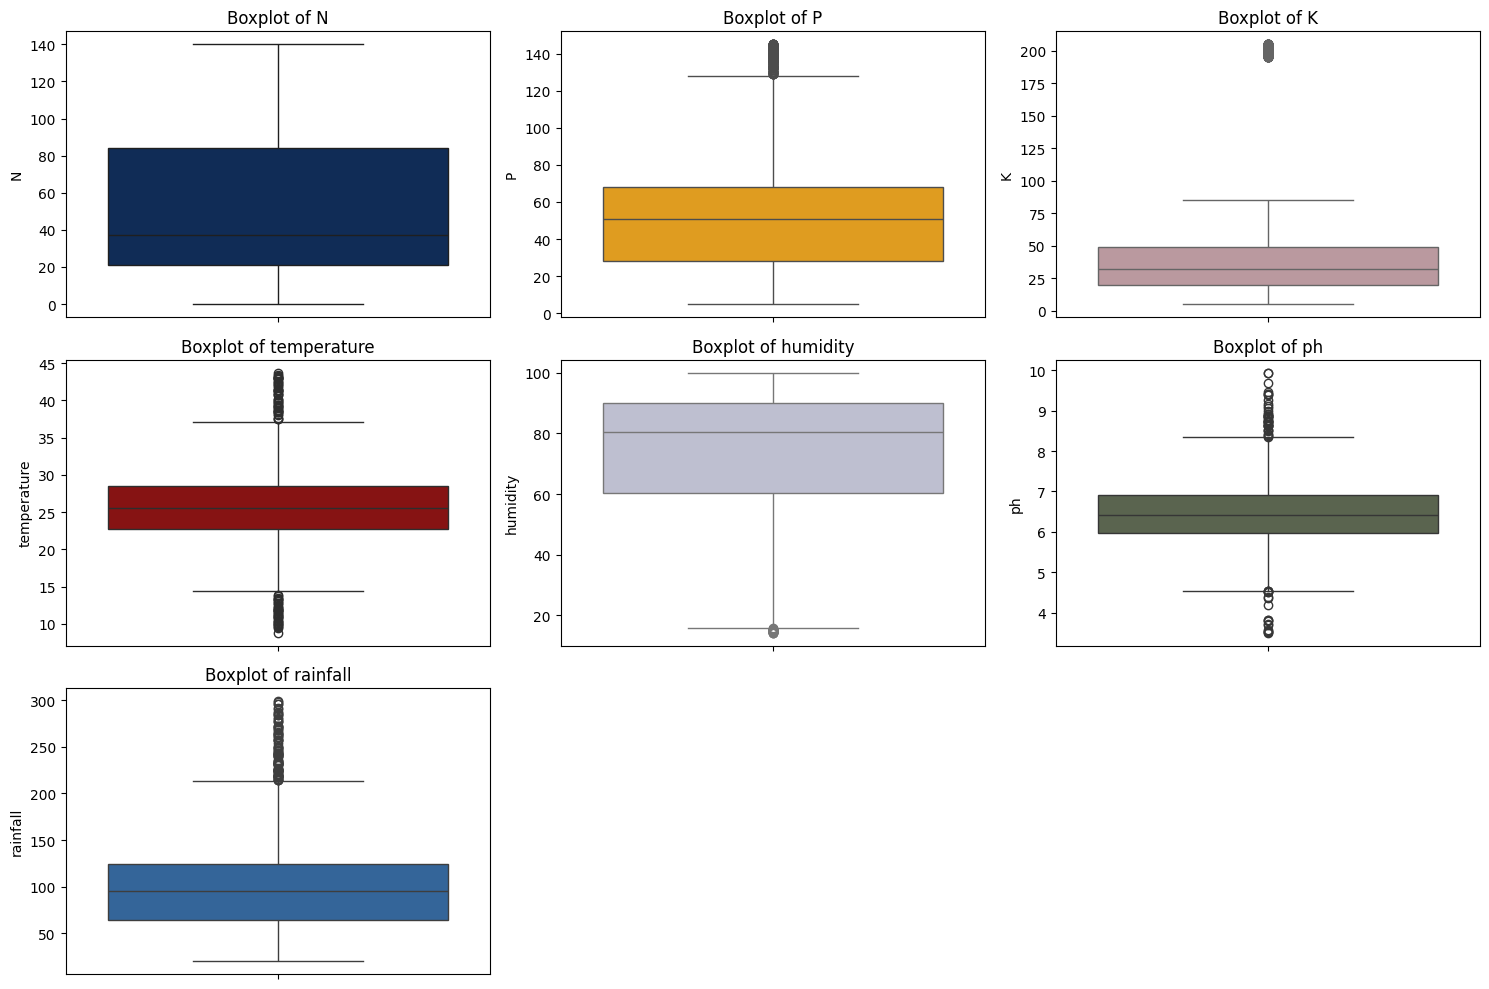

In [74]:
# Distribution of numerical features
num_features = ['N','P','K','temperature','humidity','ph','rainfall']

feature_colors = {
    'N': '#052A61',
    'P': '#FFA500',
    'K': '#bf939c',
    'temperature': '#990000',
    'humidity': '#BBBCD3',
    'ph': '#5a674c',
    'rainfall': '#2364AA'
}

plt.figure(figsize=(15,10))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color=feature_colors[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

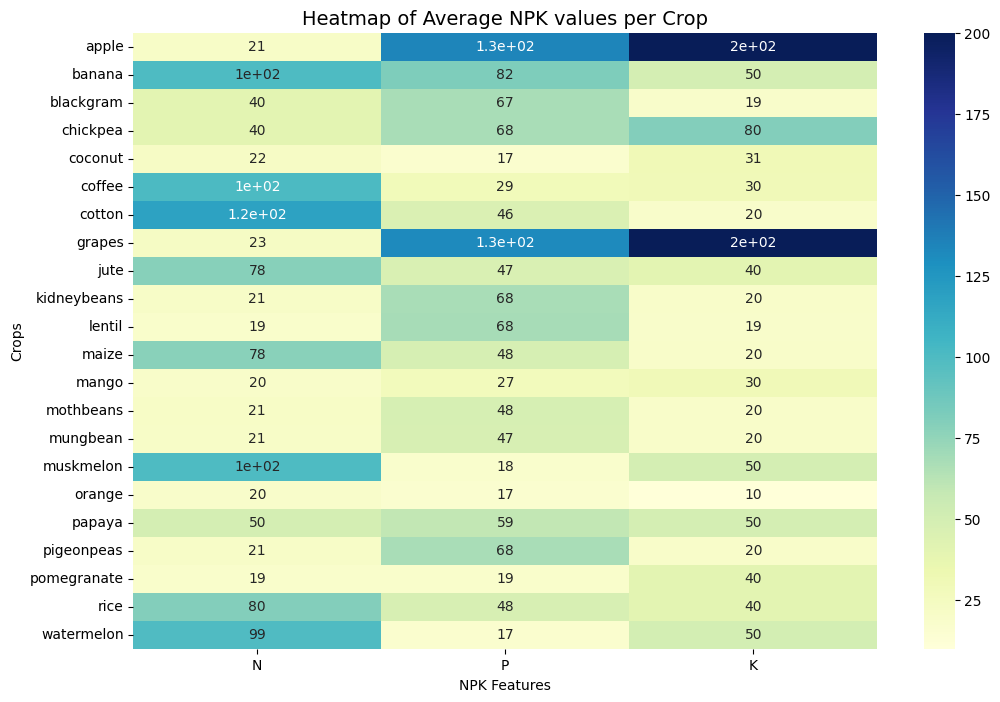

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

avg_values = df.groupby("label")[['N','P','K']].mean()

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(avg_values, annot=True, cmap="YlGnBu", cbar=True)

plt.title("Heatmap of Average NPK values per Crop", fontsize=14)
plt.ylabel("Crops")
plt.xlabel("NPK Features")
plt.show()

# **Insights:**

*    the previous plot shows how **different crops** may have almost the **same** **"average (K, N, P) values"** like (apple and grapes) , (mothbeans and mungbeans), (kidneybeans and lentil)





<Figure size 1200x600 with 0 Axes>

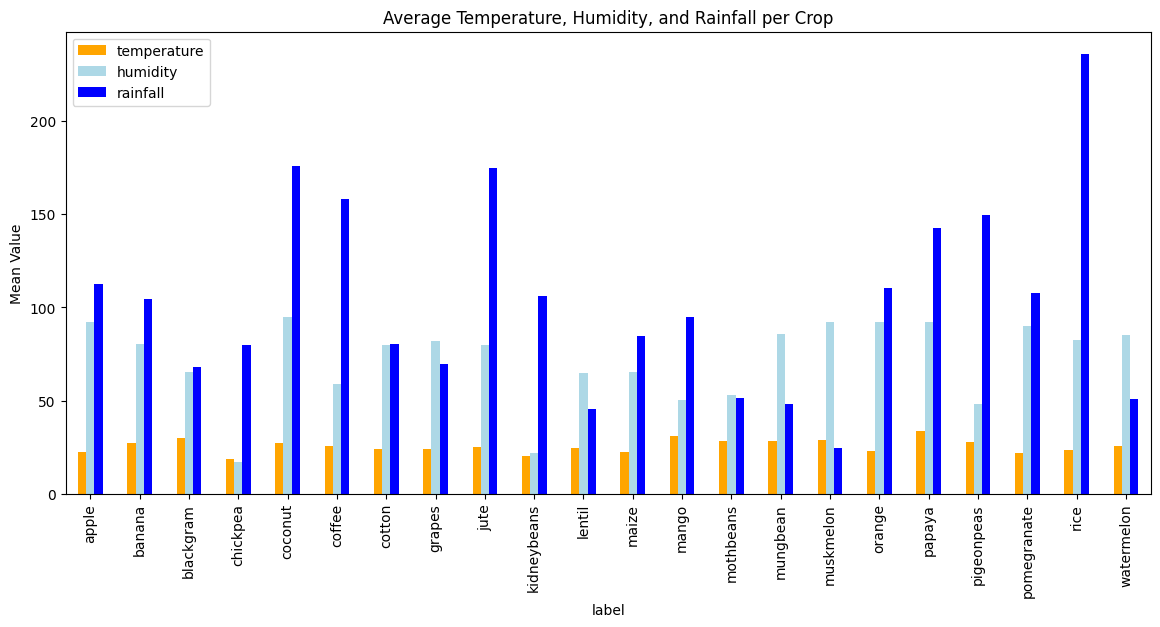

In [76]:
#  Average (temp, humidity, rainfall) values by crop

plt.figure(figsize=(12,6))
colors = ["orange", "lightblue", "blue"]
avg_values = df.groupby("label")[['temperature','humidity','rainfall']].mean()
avg_values.plot(kind="bar", figsize=(14,6), color = colors)
plt.title("Average Temperature, Humidity, and Rainfall per Crop")
plt.ylabel("Mean Value")
plt.show()

# **Insights:**
*    from the previous plot we see that the **most important** element for the crops is "**water**" while the **least** is "**temperature**"




In [77]:

# Define custom colors for each crop
crop_colors = {
    'rice': '#C2B280',        # beige like rice
    'maize': '#FFD700',       # golden yellow
    'chickpea': '#F5DEB3',    # wheat color
    'kidneybeans': '#800000', # dark red
    'pigeonpeas': '#DAA520',  # goldenrod
    'mothbeans': '#CD853F',   # peru brown
    'mungbean': '#228B22',    # green
    'blackgram': '#2F4F4F',   # dark slate gray
    'lentil': '#FF8C00',      # dark orange
    'pomegranate': '#8B0000', # dark red
    'banana': '#FFE135',      # banana yellow
    'mango': '#FFB347',       # mango orange
    'grapes': '#6A0DAD',      # purple
    'watermelon': '#FF4C4C',  # watermelon red
    'muskmelon': '#F4A460',   # sandy brown
    'apple': '#FF0800',       # apple red
    'orange': '#FFA500',      # orange
    'papaya': '#FF7518',      # papaya orange
    'coconut': '#8B4513',     # saddle brown
    'cotton': '#FFFFFF',      # white
    'jute': '#BDB76B',        # khaki
    'coffee': '#6F4E37'       # coffee brown
}

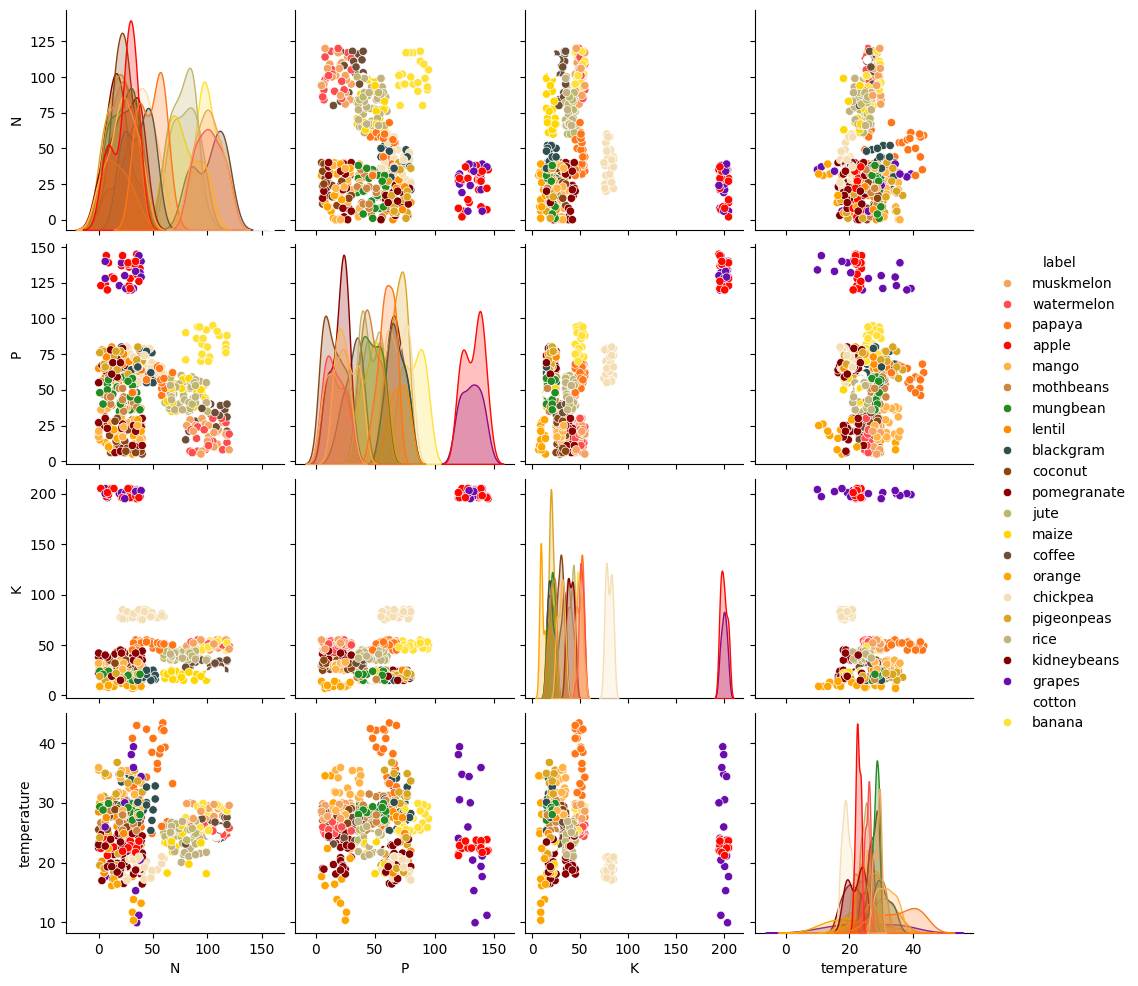

In [90]:
#  Pairplot (sample for visualization due to large dataset)
sample_df = df.sample(500, random_state=42)
sns.pairplot(
    sample_df,
    hue="label",
    vars=['N','P','K','temperature'],
    palette=crop_colors
)
plt.show()

# **Insights:**


*    this previous pairplot focuses on **core soil nutrients** and **climate factors** and shows how each individual factor influences crop distribution
*    The pairplot shows that crops are grouped into **clusters**, showing how **similar** they are in terms of **nitrogen**, **phosphorus**, **potassium** requirements, and their preferred **temperature ranges**.


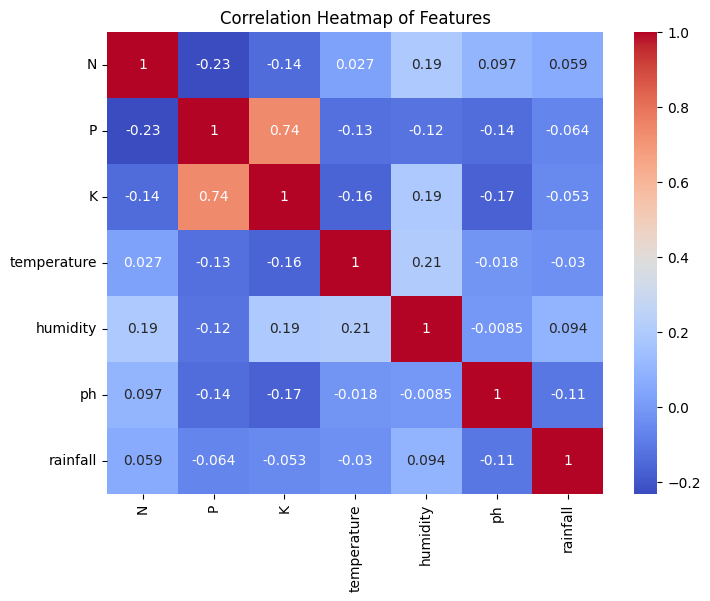

In [79]:
# Correlation heatmap
num_features = df.drop(columns=['label'])
plt.figure(figsize=(8,6))
sns.heatmap(num_features.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

# **Insights:**


*    this heatmap shows that there is a **strong** correlation between "**P**" and "**K**" , and a **good** correlation "**temp**" and "**humidity**"




# **Preprocessing**

# Feature Engineering

In [80]:
# New Feature 1
df["ph_category"] = df["ph"].apply(
    lambda x: "Acidic" if x < 5.5 else ("Neutral" if x <= 7.5 else "Alkaline")
)
# New Feature 2
df['rainfall_level'] = pd.cut(df['rainfall'],
                              bins=[0, 50, 100, 200, 300],
                              labels=['Low', 'Medium', 'High', 'Very High'])
# New Feature 3
df["NPK_Avg_Soil_Fertility"] = (df['N'] + df['P'] + df['K']) / 3    # strength of the soil

# New Feature 4
df["THI"] = (df['temperature'] * df['humidity']) / 100
# THI stands for Temperature Humidity Index

# New Feature 5
df["NP_Ratio"] = df["N"] / df["P"]     # balance between "N" & "P" elements

# New Feature 6
df["KP_Ratio"] = df["K"] / df["P"]    # balance between "K" & "P" elements

# New Feature 7
df['temp_rain'] = df['temperature'] * df['rainfall']

# New Feature 8
df['ph_rain'] = df['ph'] * df['rainfall']   # ph =5 and rain = 300mm means the soil loses elements (N P K) easily



df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,ph_category,rainfall_level,NPK_Avg_Soil_Fertility,THI,NP_Ratio,KP_Ratio,temp_rain,ph_rain
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,Neutral,Very High,58.333333,17.121963,2.142857,1.023810,4237.241986,1319.686807
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,Neutral,Very High,61.333333,17.485957,1.465517,0.706897,4934.395694,1595.223513
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,Alkaline,Very High,53.000000,18.937446,1.090909,0.800000,6072.354751,2069.534380
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,Neutral,Very High,49.666667,21.234829,2.114286,1.142857,6433.734530,1695.288324
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,Alkaline,Very High,54.000000,16.427204,1.857143,1.000000,5288.545993,2004.132110


In [81]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,NPK_Avg_Soil_Fertility,THI,NP_Ratio,KP_Ratio,temp_rain,ph_rain
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,50.687879,18.542316,1.701689,1.186896,2641.981853,664.718963
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,26.639556,6.993663,2.573334,1.350421,1540.638535,357.306973
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,5.666667,2.476132,0.000000,0.166667,560.388343,115.895678
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,31.333333,14.795581,0.350000,0.386364,1476.424780,410.684087
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,48.666667,19.278833,0.890909,0.792060,2273.703287,593.741558
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,59.666667,22.557524,1.977399,1.432924,3380.593150,801.409269
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,128.333333,40.731596,23.800000,11.000000,10577.199852,2213.021238


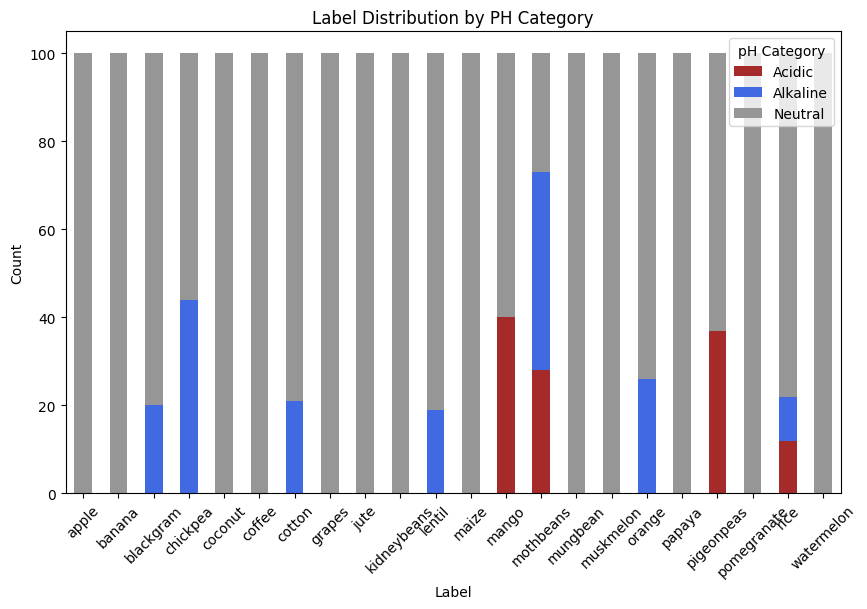

In [87]:
# label with ph_category
label_counts = df.groupby(['label', 'ph_category']).size().unstack(fill_value=0)

# Define custom colors for each ph_category
colors = {
    'Acidic': '#A52A2A',
    'Neutral': '#969696',
    'Alkaline': '#4169E1'
}

label_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=[colors[col] for col in label_counts.columns]  # assign colors
)

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution by PH Category')
plt.xticks(rotation=45)
plt.legend(title="pH Category")
plt.show()

# **Insights:**


*    this previous plot shows that most of the crops need "**Neutral**" soil



/tmp/ipython-input-2731522188.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  label_counts = df.groupby(['label', 'rainfall_level']).size().unstack(fill_value=0)


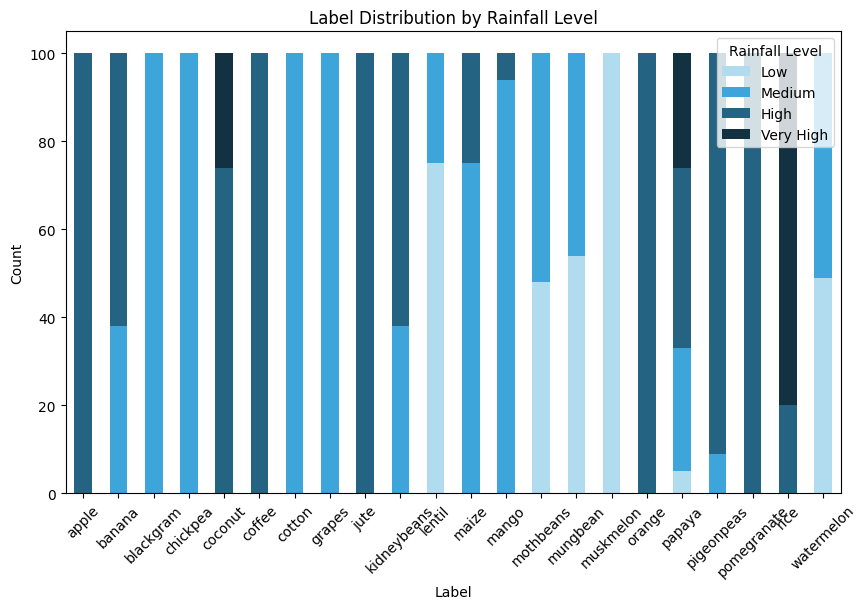

In [44]:
# label with rainfall_level
label_counts = df.groupby(['label', 'rainfall_level']).size().unstack(fill_value=0)

# Define custom colors for each rainfall_level
colors = {
    'Low' : '#b1dbef',
    'Medium' : '#3da5d9',
    'High' : '#246382',
    'Very High' : '#123141'
}

label_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=[colors[col] for col in label_counts.columns]  # assign colors
)

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution by Rainfall Level')
plt.xticks(rotation=45)
plt.legend(title="Rainfall Level")
plt.show()

# **Insights:**
*    **rainfall** is a **strong** feature influencing crop type
*    some crops (apple, jute, orange, pigeonpeas) have a clear **dependency** on "**high**" rainfall
*    while others (papaya, banana, kidneybeans) show high **variability**, meaning they are **less sensitive** to rainfall
*    "**rainfall**" is an important predictive feature

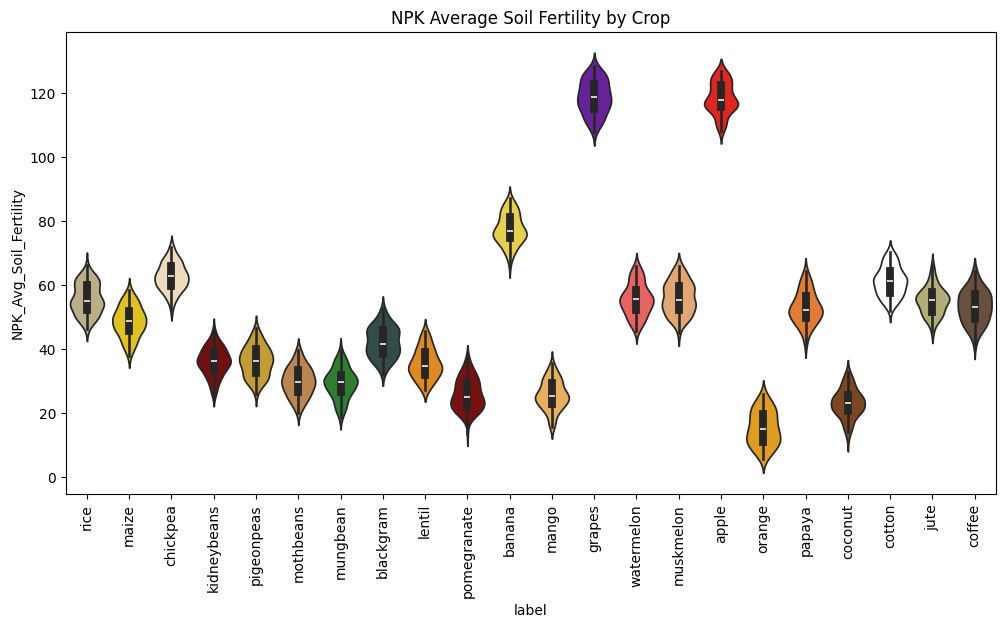

In [46]:
plt.figure(figsize=(12,6))
sns.violinplot(
    x="label",
    y="NPK_Avg_Soil_Fertility",
    data=df,
    inner="box",
    hue="label",
    palette=crop_colors
)

plt.xticks(rotation=90)
plt.title("NPK Average Soil Fertility by Crop")
plt.show()


# **Insights:**



*   if the violin shape is **wide**, it means the crop can tolerate a **broad range** of soil fertility levels, making it suitable for growth in diverse regions.

*    if the violin shape is **narrow**, it indicates the crop is more **sensitive** and requires specific **soil conditions** to thrive.

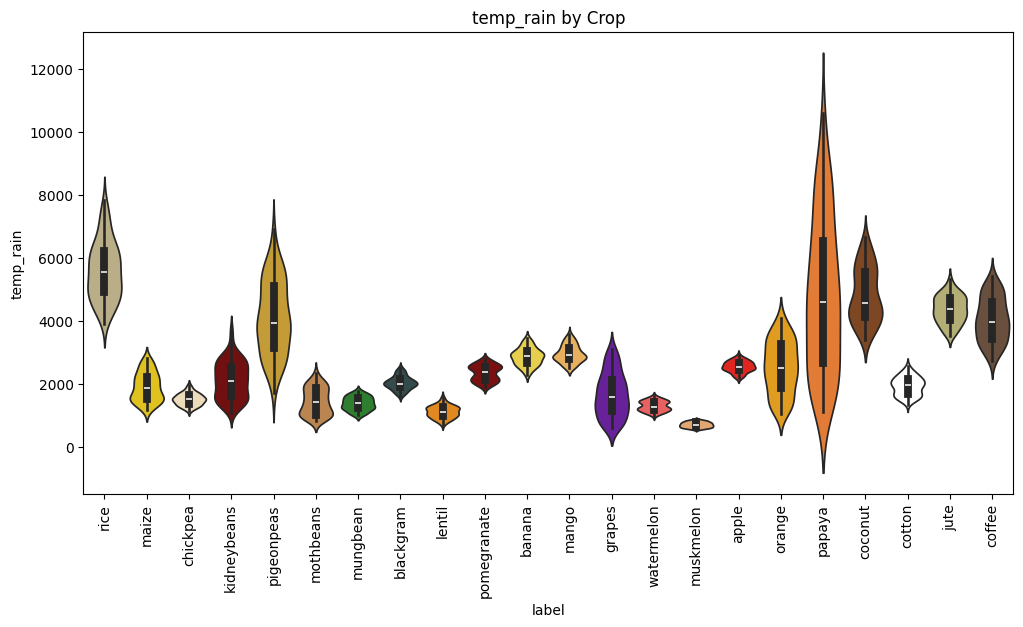

In [47]:
plt.figure(figsize=(12,6))
sns.violinplot(
    x="label",
    y="temp_rain",
    data=df,
    inner="box",
    hue="label",
    palette=crop_colors
)

plt.xticks(rotation=90)
plt.title("temp_rain by Crop")
plt.show()

# **Insights:**


*    some crops can tolerate a wide and **diverse range** of rainfall and temperature conditions, while others are **less flexible** and require **specific** levels of rainfall and temperature to grow.


In [51]:
from sklearn.preprocessing import LabelEncoder
ec= LabelEncoder()
df['label']=ec.fit_transform(df['label'])
df['ph_category']=ec.fit_transform(df['ph_category'])
df['rainfall_level']=ec.fit_transform(df['rainfall_level'])
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,ph_category,rainfall_level,NPK_Avg_Soil_Fertility,THI,NP_Ratio,KP_Ratio,temp_rain,ph_rain
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,2,3,58.333333,17.121963,2.142857,1.023810,4237.241986,1319.686807
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,2,3,61.333333,17.485957,1.465517,0.706897,4934.395694,1595.223513
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20,1,3,53.000000,18.937446,1.090909,0.800000,6072.354751,2069.534380
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20,2,3,49.666667,21.234829,2.114286,1.142857,6433.734530,1695.288324
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20,1,3,54.000000,16.427204,1.857143,1.000000,5288.545993,2004.132110


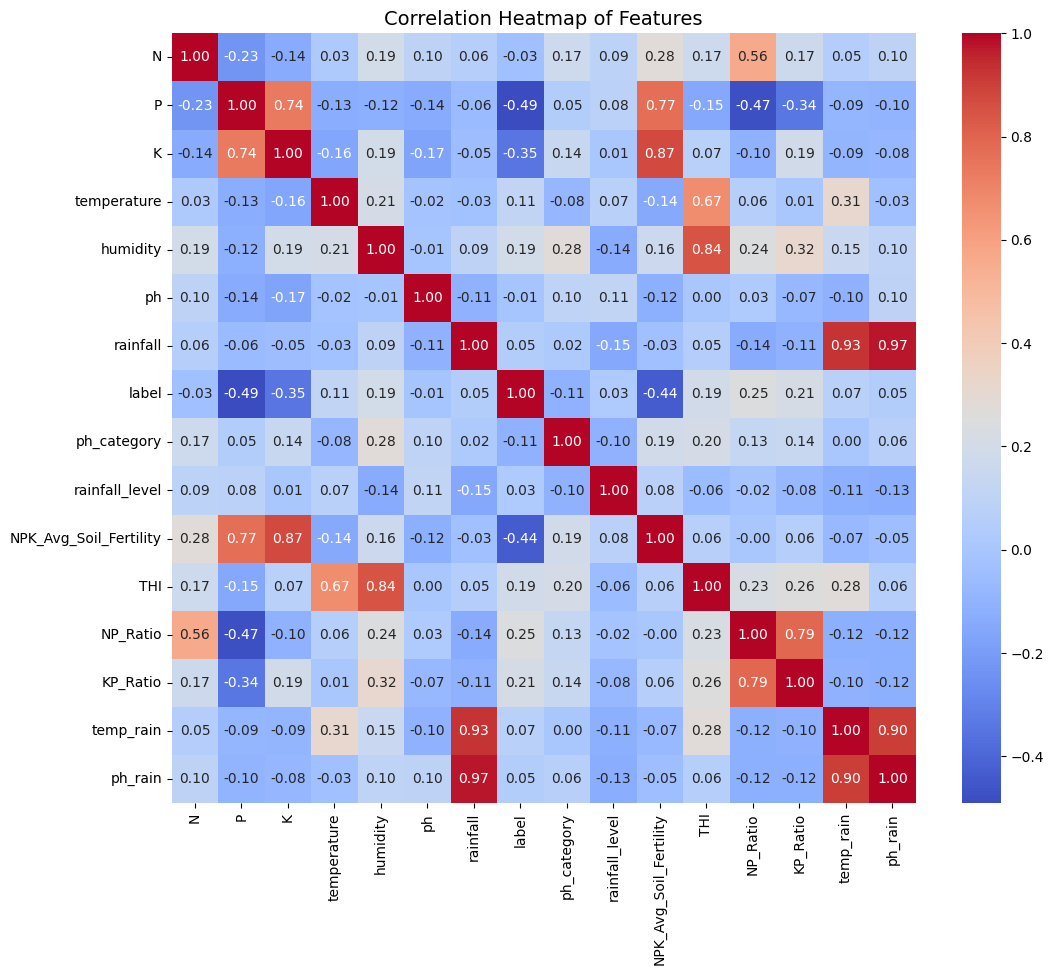

In [52]:
# Correlation heatmap (bigger and clearer)
plt.figure(figsize=(12, 10))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 10}
)
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()

# **Insights:**


*    there is a **strong** correlation between these features and the **target** **variable** (**NPK_Avg_Soil_Fertility**, **P**, **K**)




In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df.drop(['label'], axis=1)
y = df['label']

# Feature Selection

In [55]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(selected_features)


Index(['N', 'P', 'K', 'humidity', 'rainfall', 'NPK_Avg_Soil_Fertility', 'THI',
       'NP_Ratio', 'temp_rain', 'ph_rain'],
      dtype='object')


In [56]:
from sklearn.feature_selection import chi2
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)
chi2_scores = selector.scores_
chi2_df = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi2_scores
}).sort_values(by="Chi2 Score", ascending=False)

print(chi2_df)

                   Feature    Chi2 Score
13               temp_rain  1.528748e+06
14                 ph_rain  3.457020e+05
2                        K  1.167105e+05
6                 rainfall  5.480813e+04
0                        N  5.314470e+04
1                        P  4.250013e+04
9   NPK_Avg_Soil_Fertility  2.981838e+04
4                 humidity  1.475549e+04
11                NP_Ratio  5.327409e+03
10                     THI  4.706916e+03
12                KP_Ratio  1.992507e+03
8           rainfall_level  1.219287e+03
3              temperature  1.092422e+03
7              ph_category  1.053688e+02
5                       ph  7.488657e+01


In [57]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=8)
fit = rfe.fit(X, y)

print(X.columns[fit.support_])


Index(['N', 'P', 'K', 'humidity', 'rainfall', 'NPK_Avg_Soil_Fertility',
       'temp_rain', 'ph_rain'],
      dtype='object')


In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Figure size 1200x1200 with 0 Axes>

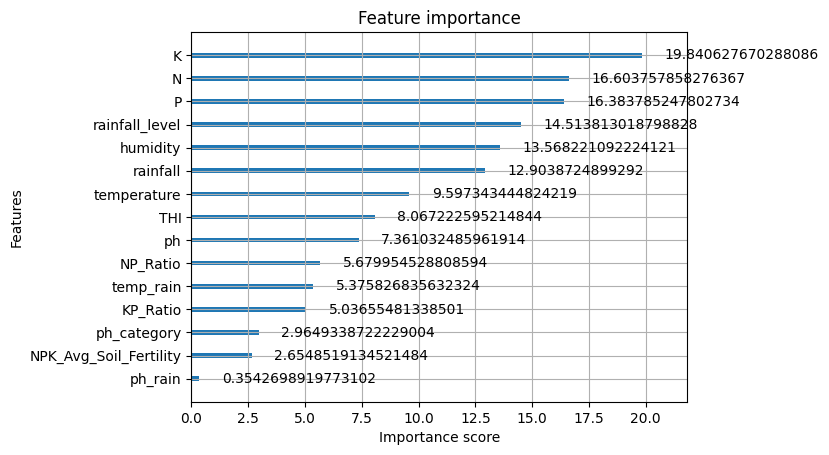

In [59]:
import xgboost as xgb
from xgboost import plot_importance

xg_cl = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    n_estimators=100,
    seed=42
)

xg_cl.fit(x_train, y_train)

#  Feature Importance
plt.figure(figsize=(12,12))
plot_importance(xg_cl, importance_type='gain')
plt.show()

# More **gain** means more **feature importance**.

<Figure size 1200x1200 with 0 Axes>

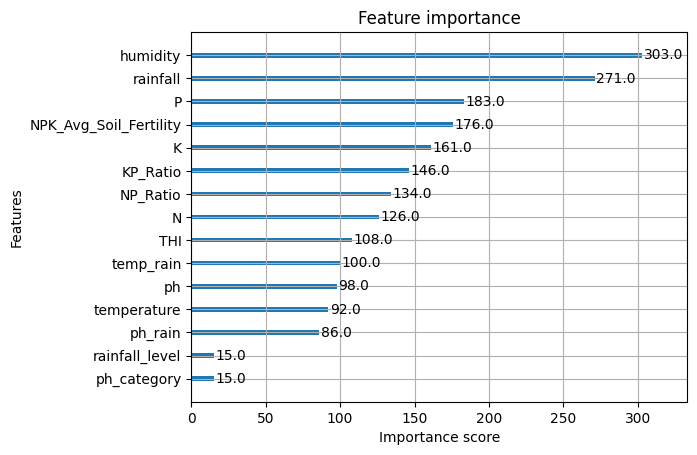

In [60]:
xg_cl = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    n_estimators=100,
    seed=42
)

xg_cl.fit(x_train, y_train)

# Feature Importance
plt.figure(figsize=(12,12))
plot_importance(xg_cl, importance_type='weight')
plt.show()

# More **weight** means the feature has been used more times to split the data during training.

# **The best features are:**

*   humidity
*   rainfall
*   N
*   P
*   K
*   NPK_Avg_Soil_Fertility
*   THI
*   NP_Ratio
*   ph_rain

**these feature were common as the most important features across multiple feature selection method**


In [61]:
X= df[['humidity','rainfall', 'N', 'P', 'K', 'NPK_Avg_Soil_Fertility', 'THI', 'NP_Ratio', 'ph_rain']]
y= df['label']

In [62]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # 15% val, 15% test